### GEOG0115

Introduction to Social and Geographic Data Science
-----------------------------------

Computer Lab 6
-------------------------------

Note: Notebook might contain scripts and instructions adapted from GEOG0115, GEOG0051. 
Contributors: Stephen Law, Mateo Neira, Nikki Tanu and Thomas Keel.

Lab Notebook 6.1: Introduction to Machine Learning in SGDS II
-------------------------------

Lab Notebook 6.1: Introduction to Machine Learning in SGDS II
-------------------------------


### Boston House Price dataset

The historic Boston Housing Price dataset (Harrison & Rubenfield, 1978) that we use was taken from the [StatLib library which is maintained at Carnegie Mellon University](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) and is freely available for download from the UCI Machine Learning Repository. The dataset consists of 506 observations of 13 attributes (1 attribute had to be removed). **The median value of house price in $10000s**, denoted by `MEDV`, is the target feature in our model. Below is a brief description of each feature and the outcome in our dataset: Variables:

* `CRIM` – per capita crime rate by town

* `ZN` – proportion of residential land zoned for lots over 25,000 sq.ft

* `CHAS` – Charles River dummy variable (1 if tract bounds river; else 0) 

* `NOX` – nitric oxides concentration (parts per 10 million)

* `RM` – average number of rooms per dwelling

* `AGE` – proportion of owner-occupied units built prior to 1940

* `DIS` – weighted distances to five Boston employment centres

* `RAD` – index of accessibility to radial highways

* `INDUS` – proportion of non-retail business acres per town

* `TAX` – full-value property-tax rate per 10,000

* `PTRATIO` – pupil-teacher ratio by town

* `LSTAT` – lower income proportions of the population

* `MEDV` – Median value of owner-occupied homes in 10000

As you will already be familiar with, we have to first load in the dataset into Jupyter Notebook. The method of importation is, however, different as the dataset is already included as part of the `sklearn` package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# load dataset
df=pd.read_csv('C://Users//jihun//Desktop//SGDS//GEOG0115 - Introduction to Social Data Science//Week 6//Practical//GEOG00115_Week6(Questions)//BostonHousing_adj.csv')

In [3]:
df.head(20)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10


In [4]:
# set X and y
X=df[df.columns[df.columns!='MEDV']] #same as df.drop(columns='MEDV')
y=df['MEDV']

print (X.shape)
print (y.shape)

(506, 12)
(506,)


### Describing the dataset
 
Having taken the precautionary steps above, we can then proceed to look at the data contained within the imported data frames. Fundamentally, we may want to explore the distributions of some important variables (columns) within their individual vectors. Beyond that, depending on your application, correlations between these variables might be something pertinent to describe the data with, or running simple diagnostics to determine if and how missingness in the data should be dealt with.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


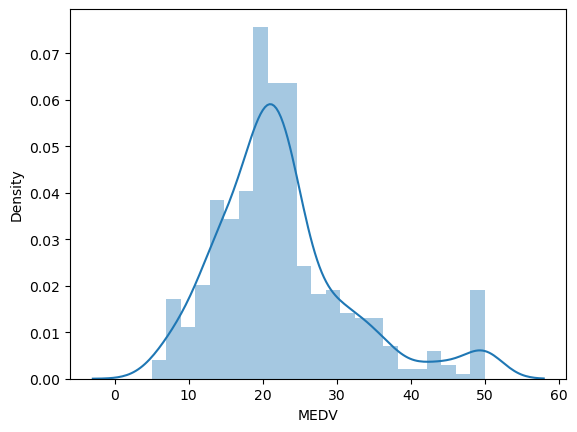

In [7]:
sns.distplot(y)
plt.show()

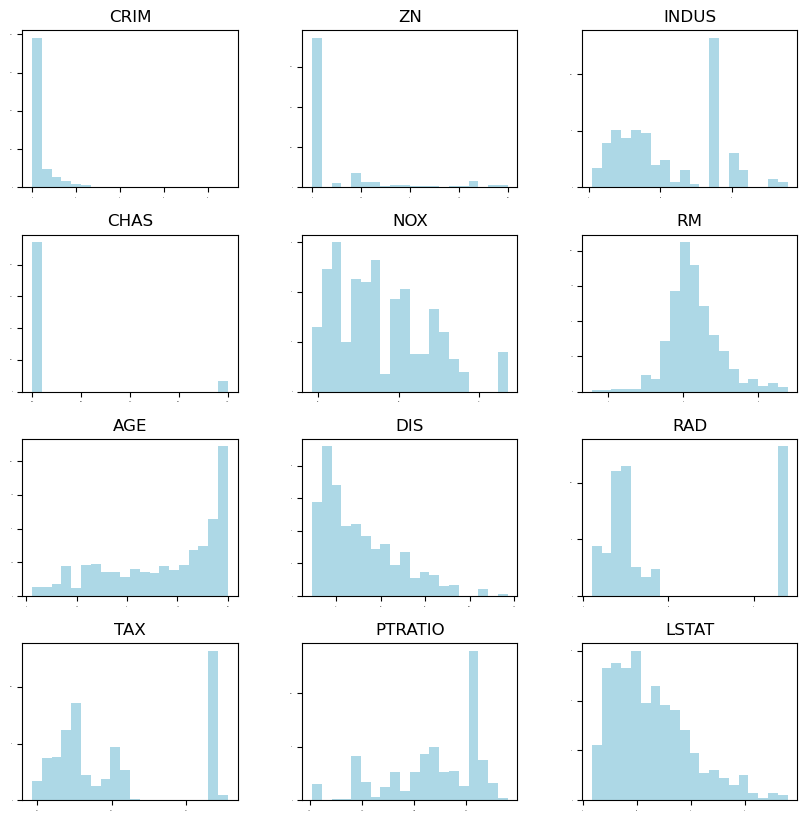

In [8]:
#Plots the distribution of the X variables to assess whether they are appropriate for regression
X.hist(bins=20, # determines how thick each 'partition' of the data (bars in each histogram) is 
       figsize=(10,10), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False
      ) # note how we can directly call the method `.hist()` because `X` is a pd.data.frame
plt.show()

### Transforming the dataset

What do you notice from the histograms above? 

It is apparent that most of the input variables are continuous (except for ```CHAS``` which is a dummy variable) and most do not follow a symmetric distribution or resembling a normal distribution. The truth is that in more datasets than not that you will be working with data that are skewed in one way or another. One common strategy is to transform predictor, particularly those that are more heavily skewed, before running a regression model. 

The main motivation for this is to approximate linearity and to reduce the potential impact of skewed distributions, which could lead to biased or inefficient estimates in the regression model.

In [10]:
# pulls out only numeric data columns - in case there were any non-numeric ones
numeric_data = X.select_dtypes(include=[np.number])

# this removes the charles river dummy variable
numeric_data.drop('CHAS', inplace=True, axis=1)
#inplace=True modifies the DataFrame in place, meaning it removes the 'CHAS' column
#directly in the original numeric_data df without needing to assign the result to a new variable

# imports function to check whether a variable is over a given amount of skewedness
from scipy.stats import skew

Note that we use the `skew` function below within an `.apply()` method of Pandas data frames, which allows us to easily reiterate an operation over rows/columns of a data frame (in this case removing any `NA`s and then once again converting the vectors to the type `float` to ensure the calculation of skewness proceeds smoothly.

The skewness values can be interpreted in the following manner and you could [read more here](https://www.pluralsight.com/guides/interpreting-data-using-descriptive-statistics-python):

* Highly skewed distribution: If the skewness value is less than −1 (left) or greater than +1 (right).

* Moderately skewed distribution: If the skewness value is between −1 (left) and −½ or between +½ and +1 (right).

* Approximately symmetric distribution: If the skewness value is between −½ and +½.

What do the values we have suggest? Refer back to the histograms of these variables that we had made earlier and consider how different values of skewness correspond to these distributions.

![skewness](https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


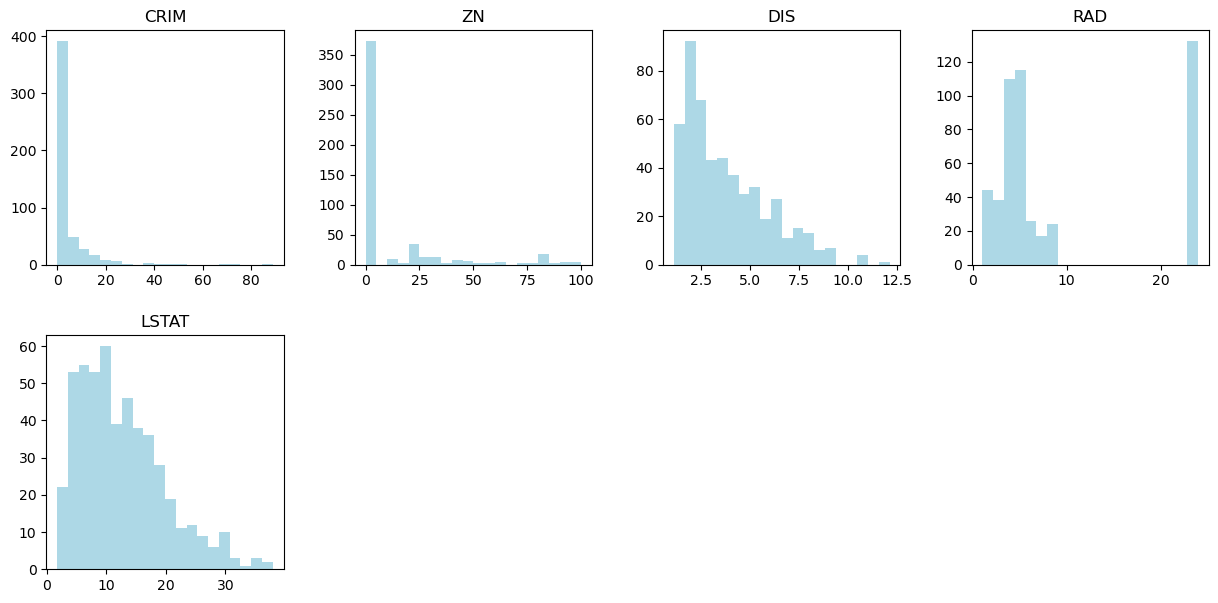

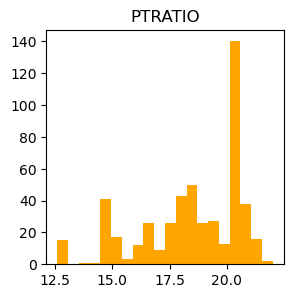

In [11]:
# Quantifies the skewness of the numeric data columns and filters based on thresholds
skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float))) #lambda is used to create a generic function

# Identify the right and left skewed variables (extract index)
rskewed = skewed[skewed > 0.75].index
lskewed = skewed[skewed < -0.75].index

# Plot histograms for right skewed variables
X[rskewed].hist(bins=20, figsize=(15, 7), color='lightblue', layout=(2, 4), grid=False)

# Plot histograms for left skewed variables
X[lskewed].hist(bins=20, figsize=(15, 7), color='orange', layout=(2, 4), grid=False)
plt.show()

In [12]:
#same as 
# Define the function
def calculate_skew(column):
    return skew(column.dropna().astype(float))

# Apply the function to each column
skewed = X[numeric_data.columns].apply(calculate_skew)

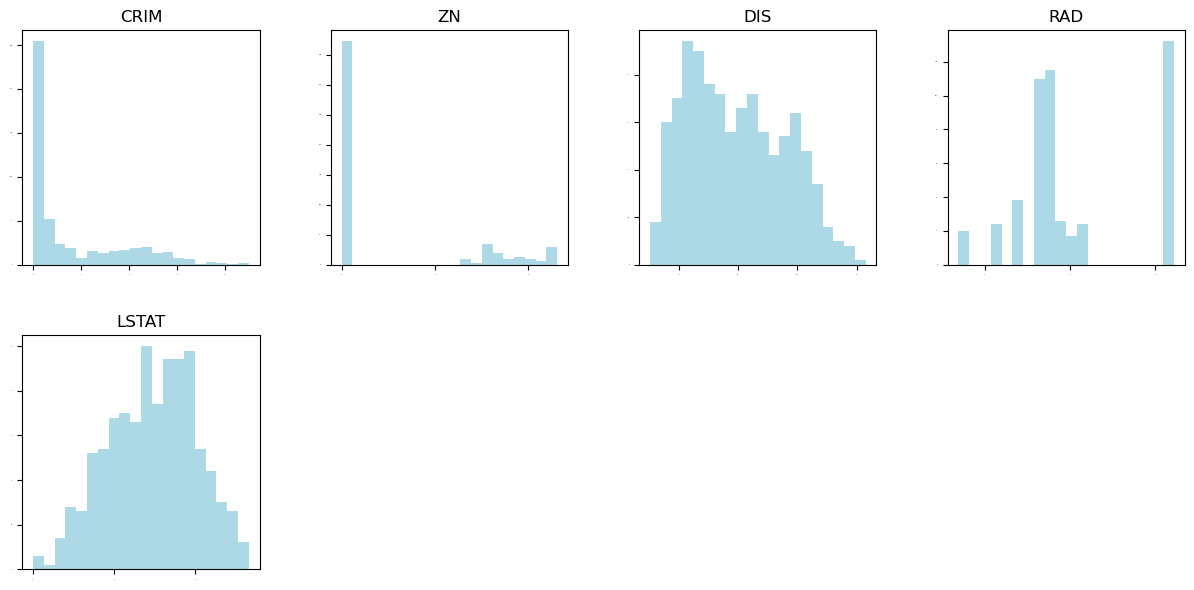

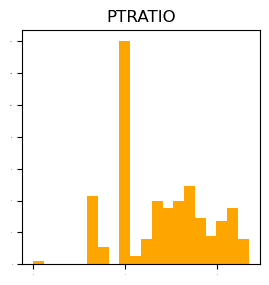

In [13]:
# log-transforms the highly right skewed variables of the dataset
X[rskewed] = np.log1p(X[rskewed])

#for left-skewed data, you need to reflect the values first before applying the log transformation (i.e. make them right-skewed)
X[lskewed] = np.log1p(np.max(X[lskewed])-X[lskewed]) 

# now plot again the variables after their log transformation
X[rskewed].hist(bins=20,figsize=(15,7), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False, layout=(2,4))
plt.show()

# now plot again the variables after their log transformation
X[lskewed].hist(bins=20,figsize=(15,7), color='orange', xlabelsize=0, ylabelsize=0, grid=False, layout=(2,4))
plt.show()


#### note on transformation

Here we apply a common log transformations on the rightly skewed variable and leftly skewed variable. Logarithm is a very typical transformation to reduce the skewness of a variable while preserving the differences. 

What do you notice different pre- and post-transformation for the variables above? For which variables does the log-transformation seem to make it less skewed? It is important to note, data transformations is common to make skewed variable less skewed but it must be applied very cautiously and it isn't a necessary condition for running regression models as you loses interpretability for the specific feature. 

Be sure to play around with the many different arguments that allow you to customise the look of your multi-grid histogram plots with the `.hist()` (and all the other functions you come to interface with). 

### Correlations/Covariance between variables

As well as for skewedness of individual variables, it is useful to check for correlations between variables that we use as predictors. Strongly correlated predictor variables may, for instance, indicate that two predictors are measuring similar real-world concepts. (In statistical inference, this can be checked by the **variation inflation factor**.)

### correlation matrix
We can use a correlation matrix to understand the association between variables. Variables are almost always correlated. Ideally, we want our input variables to not be totally correlated with one another. Significant correlation between our independent variables undermines the robustness of our model and interpretability. 

In [14]:
# calculate correlation matrix between all variables. Defaults to Pearson's r correlation
corr = X.corr()

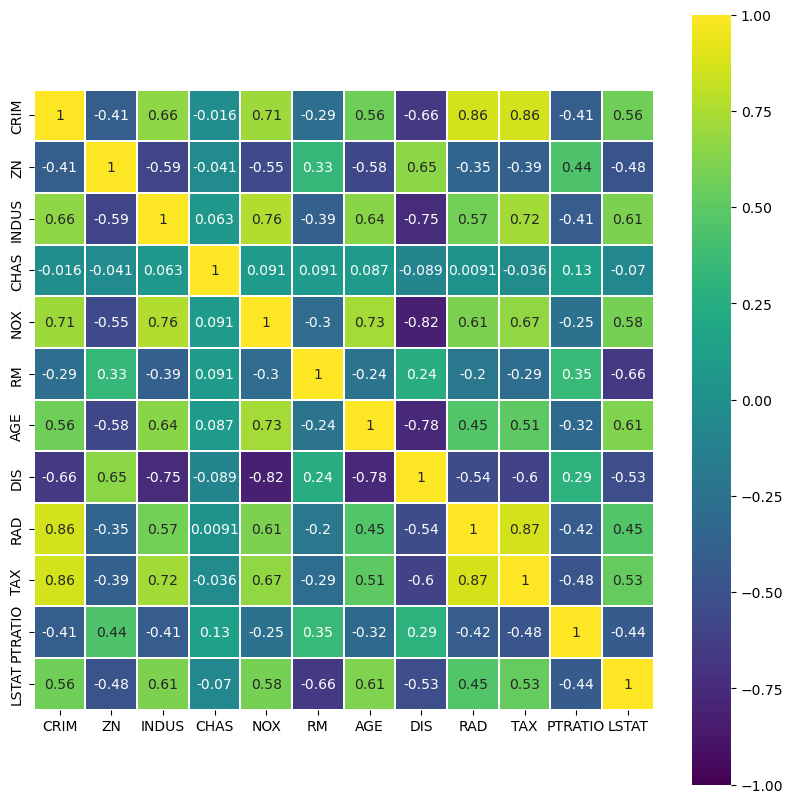

In [15]:
# Let's make our plot a little nicer
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, center=0,cmap=plt.get_cmap('viridis'),
            square=True, linewidths=.05, annot=True, vmin=-1, vmax=1,ax=ax) 
plt.show()

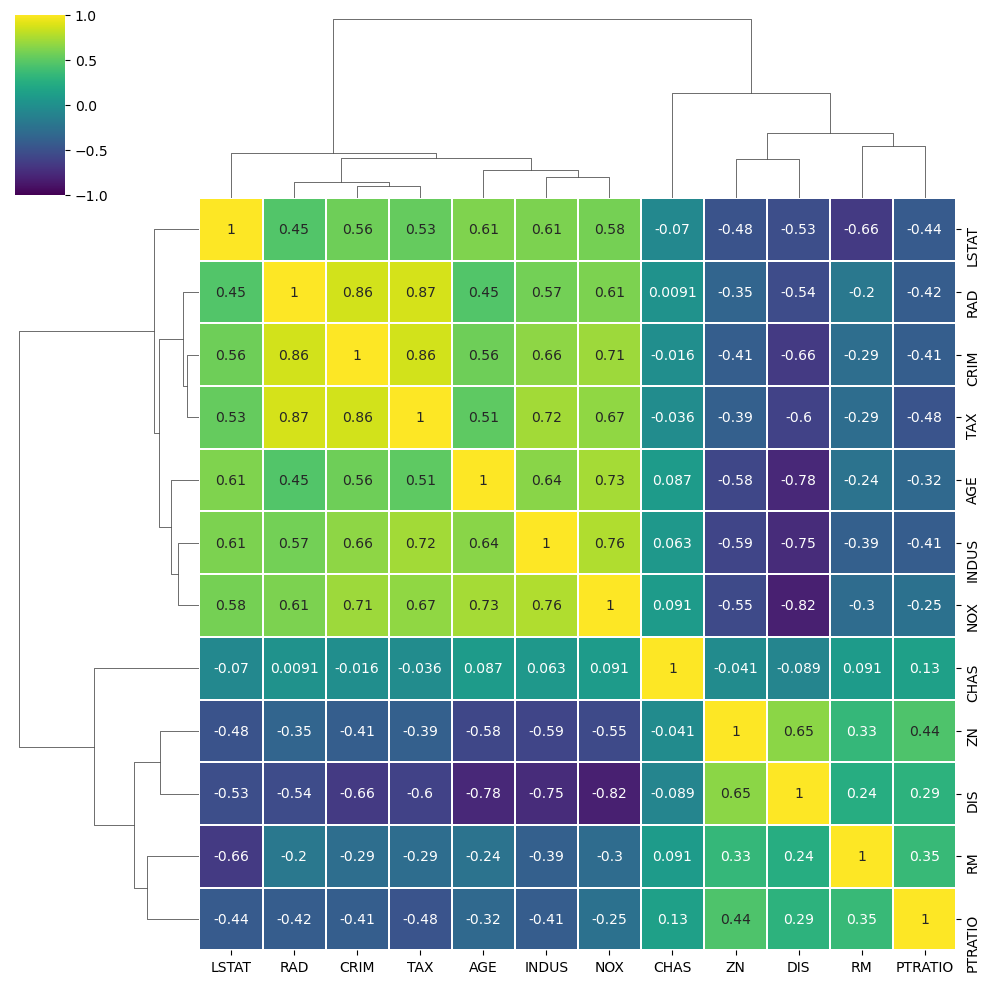

In [16]:
# hierarchically-clustered heatmap of correlation matrix to understand the association between variables
corr = X.corr()
sns.clustermap(corr, center=0,cmap=plt.get_cmap('viridis'),
            square=True, linewidths=.05, annot=True, vmin=-1, vmax=1) 
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #scaling the features so they have a mean of 0 and a standard deviation of 1
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

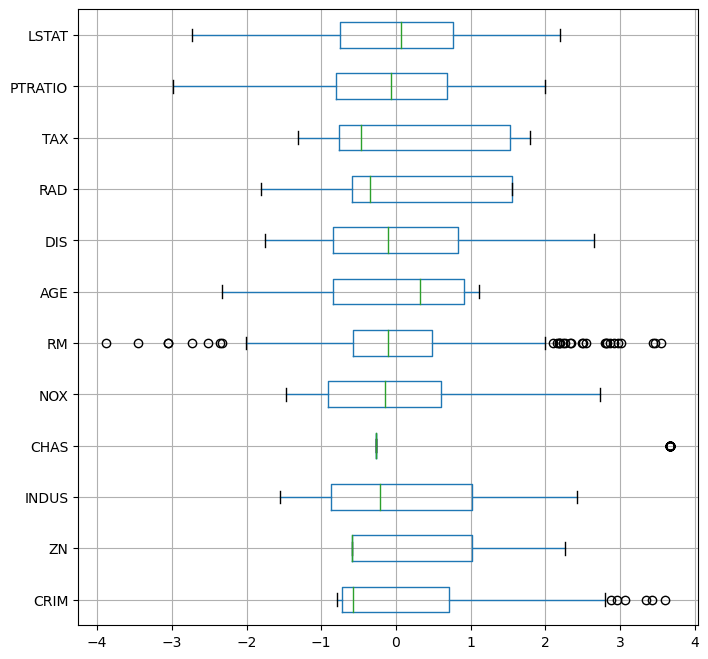

In [18]:
scaled_X.boxplot(vert=False,figsize=(8,8))
plt.show()

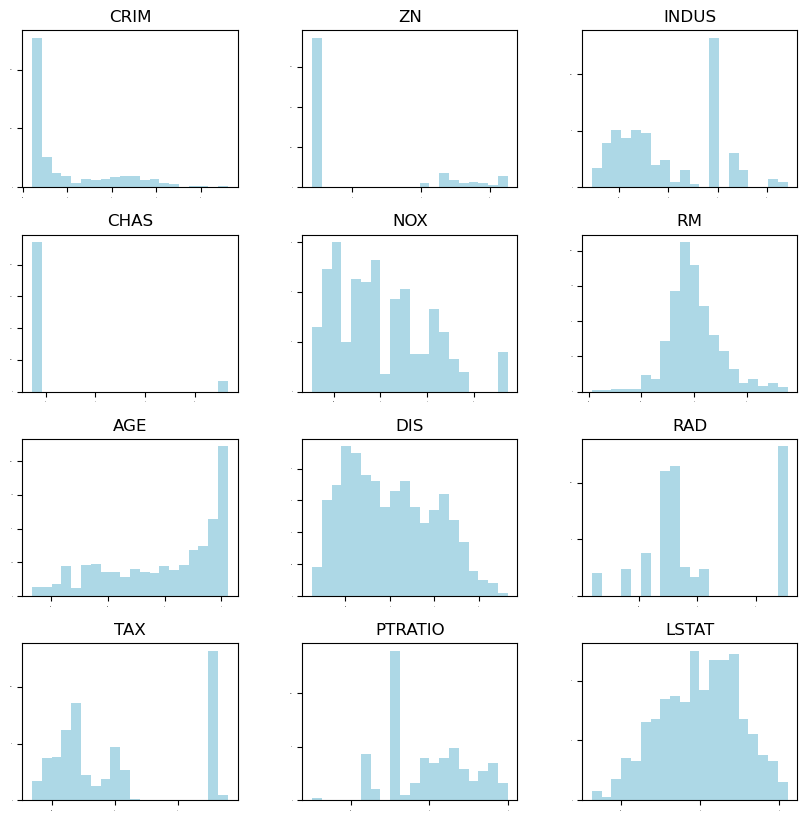

In [19]:
#Plots the distribution of the X variables to assess whether they are appropriate for regression
scaled_X.hist(bins=20, # determines how thick each 'partition' of the data (bars in each histogram) is 
       figsize=(10,10), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False
      ) # note how we can directly call the method `.hist()` because `X` is a pd.data.frame
plt.show()

### spliting the dataset into a train and test set

Before we run the linear model, as a recap, remember how it is common in most Machine Learning applications to split the dataset up into at least two groups - the `train` and `test` sets, so as to ensure a degree of robustness and generalsability in the models we estimate. By building the model using one dataset, `train`, and testing its accuracy of predictions with an 'unseen' dataset, `test`, we can calibrate our models based on a realistic criterion. One major risk of not doing this would be to overfit the model, which means that, because it becomes so attuned to predicting values in the dataset it was trained on, it becomes much less generalisable and quickly falters when any other dataset is ever so slightly different in its structure. 

Below, [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will help us do this. 

In [20]:
### split the dataset
(X_train, X_test, y_train, y_test) = train_test_split(scaled_X, y, train_size=0.7, random_state=3)

## 6.1.1 Linear regression model 
Given a dataset of $n$ observations, LinearRegression takes a set of input features and trains a linear model to predict the target which takes the general form
$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_px_{ip}+\epsilon_i, i=1,...,n$ observations, where $x_{i}$ are the set of inputs, $\beta$ are the corresponding coefficients and $y_i$ is the target. 

For example, in a simple linear regression model, the input can be the years of education $x_i$ and the target can be the income $y_i$. The aim of the linear regression is thus to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the model $y_i-\hat{y_i}$. Important to note the linear regression model assumes linearity and normality of errors. 

<img src="regression.png" alt="Description" width="400" height="300">

More formally the objective is to miniminise the loss function $argmin_{\beta} \sum_i^n (y_i - \hat{f}(x_i))^2$ where the weights $\beta$ can be estimated analytically (Least Square solution) or iteratively (Gradient Descent). 

Least square (OLS)
```from sklearn import linear_model```

gradient descent 
```from sklearn.linear_model import SGDRegressor```

https://scikit-learn.org/stable/modules/linear_model.html

Please read for more informaiton:
https://mlu-explain.github.io/linear-regression/

In [21]:
# define Linear Regression model (OLS)
model=LinearRegression()

In [22]:
# fit model on training data
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# report accuracy score for linear regression model
y_pred=model.predict(X_test)
print ('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred)) #R2 of 0.x means that the model explains x% of the variance in the target variable

RMSE:  4.194384944934356
MSE:  17.592865066291978
R2:  0.7763158133590862


#### Feature Importance (Explainability Methods)

Feature importance is an explaination technique to inspect a model. 
There are different ways to measure feature importance in machine learning models. 
For a linear model, ones can simply show the beta coefficients of the model similar to statistical analysis. 

For a more expressive model, a **model agnostic** way to explain model is [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance). 


**AdvanceNote(optional)** 
There are many other explainability methods. Shapley values is one that are used to explain the contributions of individual features to the predictions that considers all possible combinations made by complex models like gradient boosting or neural networks. This method is particularly valuable when you need to make black-box models more transparent. 

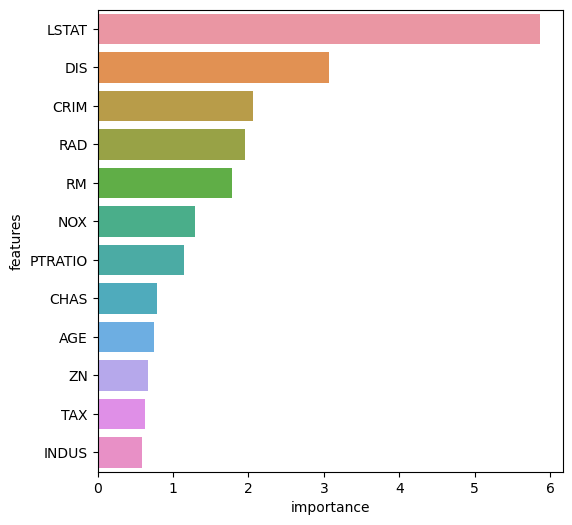

In [24]:
# you can then easily plot out feature importance for variables in descending order
coef = pd.DataFrame(model.coef_, index = X.columns)
coef = coef.reset_index()
coef.columns=['features','importance']
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

## Isolating problems in our model's prediction
Sometimes we want to isolate where our model have failed, so we have some idea about the shortcomings of our model and also an indication of how we can supplment and improve its inputs.   

Let's look for the residuals with relatively large values. *Remember that*, residuals are the differences between observed and predicted values of data. In this case, we may interpret residuals as outliers.

*Remember also* that our data refers to the "Median value of owner-occupied homes in 10000(£)", so any large residuals indicate areas where we are not very good at predicting Median value in those rows.

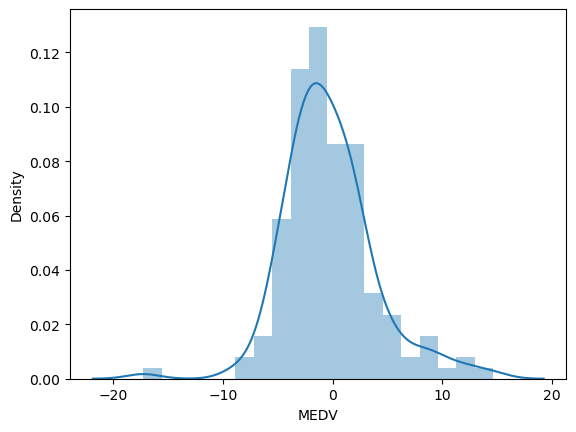

In [25]:
y_resid = y_test - y_pred
sns.distplot(y_resid)
plt.show()

In [26]:
# Let's take all values that are more than 10 or less than -10
y_resid_high = y_resid[y_resid>10].sort_values(ascending=False)
y_resid_high

214    14.623243
186    12.945444
412    11.412153
166    11.050910
Name: MEDV, dtype: float64

In [27]:
y_resid_low = y_resid[y_resid<-10]
y_resid_low

364   -17.240574
Name: MEDV, dtype: float64

In [28]:
# Take a look at those values in the original data
df.iloc[y_resid_high.index]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
214,23.7,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,29.55
186,50.0,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,4.45
412,17.9,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,34.37
166,50.0,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,3.70


In [46]:
# Take a look at those values in the original data
df.iloc[y_resid_low.index]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
364,21.9,3.47428,0.0,18.1,1.0,0.718,8.78,82.9,1.9047,24.0,666.0,20.2,5.29


### Sanity checks - Interpreting residuals
**Open-ended question**: Is there anything characteristic about these rows?

*Note that:* Often outliers indicate there is some other dependency or unaccounted for trend in our data (i.e. a spatial dependency). Sometimes we can include more variables, more data, do different feature engineering to reduce residuals. **BUT**  Although it may be hard to interpret here, when you use a dataset you are more familiar with or one with a spatial element (LSOA, borough, State, Country, etc.), you will be able to isolate outliers and say something about where your model is and is not effective. And this inaccuracy is also valid and important for broader scientific knowledge discovery.

In general, it is always useful to take a look at the outliers as sanity checks. If the data is geographical, the results can be plotted as a residual map to see whether the outliers cluster together. 


### Statsmodel - An alternative library to estimate Generalised Linear Model in Python

**Statsmodel** is an alternative library for estimating generalised linear models such as linear regression in Python. The library is more focus on statistical inference rather than machine learning prediction (sklearn). It reports on many statistics and inferential tests on the data that is not being reported in sklearn. This includes individual ```confidence intervals``` and ```t-tests``` to test the statistical significance for each input feature and useful model comparison metrics such as ```AIC``` and ```BIC```. This class focuses more on machine learning methods but it is important to note that similar statistical inference can be estimated with using statsmodels. It is important that we did not resample the dataset but a similar procedure can be applied here when running the regression model using Statsmodel.  

See intpretation of OLS summary here: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/ 

In [29]:
import statsmodels.regression
# Set up Linear regression model
ols = statsmodels.regression.linear_model.OLS(y, X)
# fit model
results = ols.fit()

In [30]:
## Summarise the model fit
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1057.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:53:30   Log-Likelihood:                         -1502.2
No. Observations:                 506   AIC:                                      3028.
Df Residuals:                     494   BIC:                                      3079.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Stochastic Gradient Descent Regressor


SGD stands for Stochastic Gradient Descent which uses gradient descent to fit a regression in an iterativel manner. Figure below illustrates the gradient descent algorithm which is to update $\beta$ until loss is minimised or when the model is best fitted. This algorithm is generic and can be applied to many machine learning modelling methods!

<img src="gradient_descent02.png" alt="Drawing" style="width: 400px;"/>


The main parameter to tune in a gradient descent algorithm is the learning rate $\alpha$ which dictates how fast to change the weights and the number of epochs or iterations. If the learning rate is set too high then the optimal solution might not be found while if the learning rate is set too low then the convergence will take a long time. 


```from sklearn.linear_model import SGDRegressor```

```class sklearn.linear_model.SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)```

#### 🤨 TASK
Try replacing ```LinearRegressor``` with ```SGDRegressor```, try tuning the learning rate and number of epochs.  Take a look at the ```SGDRegressor``` class for more information about each of its hyper-parameters.  

In [31]:
from sklearn.linear_model import SGDRegressor
# Define stochastic gradient descent model
model=SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1000)
# fit model on training data
model.fit(X_train,y_train)
# report accuracy score for the gradient descent model
y_pred=model.predict(X_test)
print ('RMSE: ', mean_squared_error(y_test,y_pred,squared=False))
print ('MSE: ', mean_squared_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred)) #R2 of 0.x means that the model explains x% of the variance in the target variable

RMSE:  4.219604306433766
MSE:  17.80506050287438
R2:  0.7736178580537965


### Lasso Regression

Lasso Regression is a regularised linear model that includes an additional $\ell^1$ loss in order to estimate sparse coefficients. In another words it shrinks less important coefficients to enhance prediction accuracy and interpretability. The alpha parameter of the Lasso needs to be tuned. Lasso regression is a model-based feature selection method.

<img src="feature_selection.png" alt="Description" width="400" height="300">

```from sklearn import linear_model```

```class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')```

https://scikit-learn.org/stable/modules/linear_model.html#lasso

In [32]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.1)
model2.fit(X_train,y_train)

Lasso(alpha=0.1)

#### 🤨 TASK
Try tuning the $\alpha$ parameter for the lasso regressor. What happens when you tune the $\alpha$ very high? Plot out the feature importance here as a task and compare it with the linear regressor.

In [34]:
from sklearn import linear_model
model3 = linear_model.Lasso(alpha=0.2)
model3.fit(X_train, y_train)

# report accuracy score for linear regression model
y_pred = model3.predict(X_test)
print ('RMSE: ', mean_squared_error(y_test,y_pred, squared=False))
print ('MSE: ', mean_squared_error(y_test, y_pred))
print ('R2: ', r2_score(y_test,y_pred)) #R2 of 0.x means that the model explains x% of the variance in the target variable

RMSE:  4.425723600823923
MSE:  19.58702939088987
R2:  0.7509610446335153


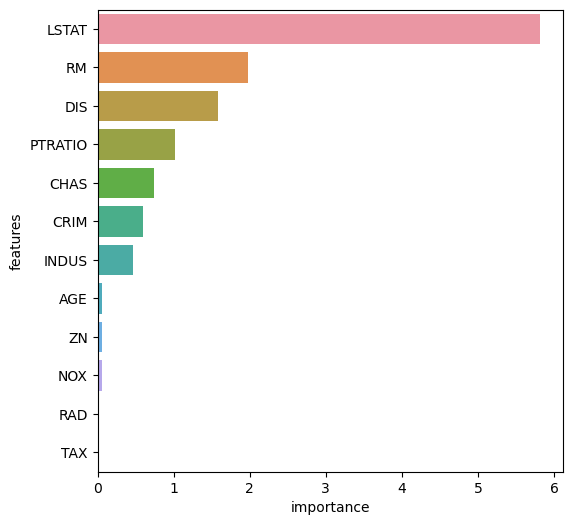

In [35]:
# you can then easily plot out feature importance for variables in descending order
coef = pd.DataFrame(model3.coef_, index = X.columns)
coef = coef.reset_index()
coef.columns=['features','importance']
coef
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

## 6.1.2 Tree-based Regression

Decision Trees (DTs) is a supervised learning method used for classification or regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. As implied by the 'tree' in its name, the model can pass each observation that goes through it via multiple branches (/routes) of decisions to help it derive a final outcome for that given observation). 

<img src="decision_tree.png" alt="Description" width="400" height="300">


Below is an indicative example where a simple decision tree (maxdepth=2) is used to find out which mode of transport will a person take to go to work; car? public transport? or walk? using n=30 observations. 

1. The first split was found where 
if distance<1.2km then walk;
else public transport or car

2. The second split was found where 
if person has driver license then mostly drive;
else mostly public transport.


Decision Tree aims to split a dataset based on some features optimally (evaluation metric) using the **CART algorithm** and iterates until loss is zero or if maximum depth of the tree reaches a threshold. 


Click for information on the [parameters of the decision tree function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### 🤨 TASK
Try replacing ```LinearRegressor``` with ```Decision Tree Regressor```, try tuning the different hyper-parameters of a decision tree. 

Please read the sklearn manual here to learn more about decision tree.  
https://scikit-learn.org/stable/modules/tree.html#tree

In [36]:
from sklearn import tree
dt_model = tree.DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

# report accuracy score for linear regression model
y_pred = dt_model.predict(X_test)
print ('RMSE: ', mean_squared_error(y_test,y_pred, squared=False))
print ('MSE: ', mean_squared_error(y_test, y_pred))
print ('R2: ', r2_score(y_test,y_pred)) #R2 of 0.x means that the model explains x% of the variance in the target variable

RMSE:  4.546600812405727
MSE:  20.67157894736842
R2:  0.737171557560288


### Evaluation metrics - regression

The coefficient of determination **R2** measures the proportion of variance of the target that can be explained by the input features. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.

$ 1-\sum \frac{(y_i-\hat{y_i})}{(y_i-\bar{y_i})} $

The Mean Squared Error **mse** measurse the averaged squared error between the observed and the predicted. Similarly it provides an indication of goodness of fit where the lower is better.

$\frac{1}{n} \sum (y_i - \hat{y_i})^2 $

The Mean Absolute Error **mae** measures the average absolute error between the observed and the predicted. Similarly it provides an indication of goodness of fit where the lower is better.

$\frac{1}{n} \sum |y_i - \hat{y_i}| $

MSE:  18.484222971517983
MAE:  3.1527497528525057
R2:  0.7649826582825747


Note: Are these results sensible? Is the mean absolute error here meaningful? 

### Hyper-Parameter Tuning - Exhaustive Grid Search

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, **GridSearchCV** exhaustively considers all parameter combinations, while **RandomizedSearchCV** can sample a given number of candidates from a parameter space with a specified distribution. 

```from sklearn.model_selection import GridSearchCV```

```class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)```


In [37]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.001)

In [38]:
# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]}]

In [39]:
### Grid Search cross validation
from sklearn.model_selection import GridSearchCV
LASSO_GridSearch = GridSearchCV(model2, tuned_parameters, cv=5, scoring='r2')
LASSO_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid=[{'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]}],
             scoring='r2')

In [40]:
print ("Best Score: {}".format(LASSO_GridSearch.best_score_))
print ("Best params: {}".format(LASSO_GridSearch.best_params_))

Best Score: 0.7577776104524712
Best params: {'alpha': 0.001}


## 6.1.3 Principal Component Analysis

The goal of principal component analysis **PCA** is to find a sparse set of ordered uncorrelated components that are linear combinations of the inputs in capturing most of the variance in the data. It is a dimension reduction technique. The first principal components capture the most variance follow by the second components and so on.

<img src="pca.png" alt="Description" width="400" height="300">

The technique is used in exploratory data analysis and dimension reduction. Algorithmically this can be accomplished by either applying the Eigendecomposition on the covariance matrix or the Singular Value Decomposition on the data matrix to find these components. PCA is sensitive to the scaling of features. Before applying PCA, we have to scale our data. Each scaled feature will have unit variance. 

After running principal components analysis, given some input $x_j,(j=1,...,p)$, the first principal component is $pc^1=w^1_1x_1+w^1_2x_2+...+w^1_px_p$ where $w^1_j,(j=1,...,p)$ are the weights learnt from the decomposition.

```from sklearn.decomposition import PCA```

```class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)```

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html



In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [42]:
#inv_x = scaler.inverse_transform(scaled_x)
n=int((scaled_x.shape[1]))
pca = PCA(n_components=n)
X_proj = pca.fit_transform(scaled_x)
pcadf = pd.DataFrame(data = X_proj)

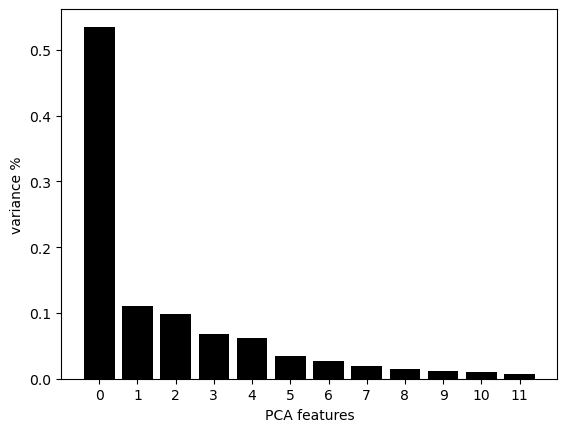

In [43]:
response=list(range(n))
plt.bar(response, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(response)
plt.show()

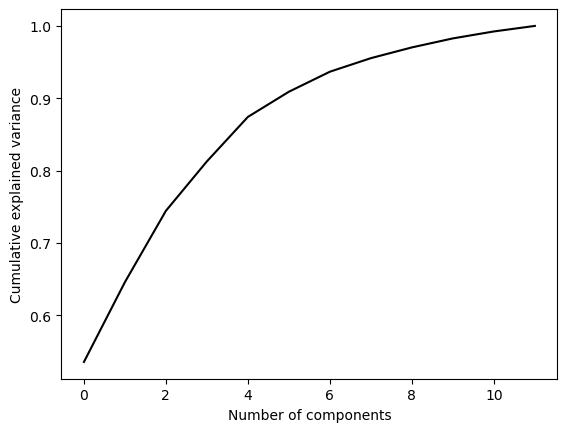

0.9999999999999998

In [44]:
response=list(range(n))
pcadf_p=pcadf[response]
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
np.sum(pca.explained_variance_ratio_)

From the plot we can see that the first 4 components contributes to 81% of the total variance. We can make a heatmap to see how the original features contribute to create each one of these component.

This will tell us how much each feature influences each component.

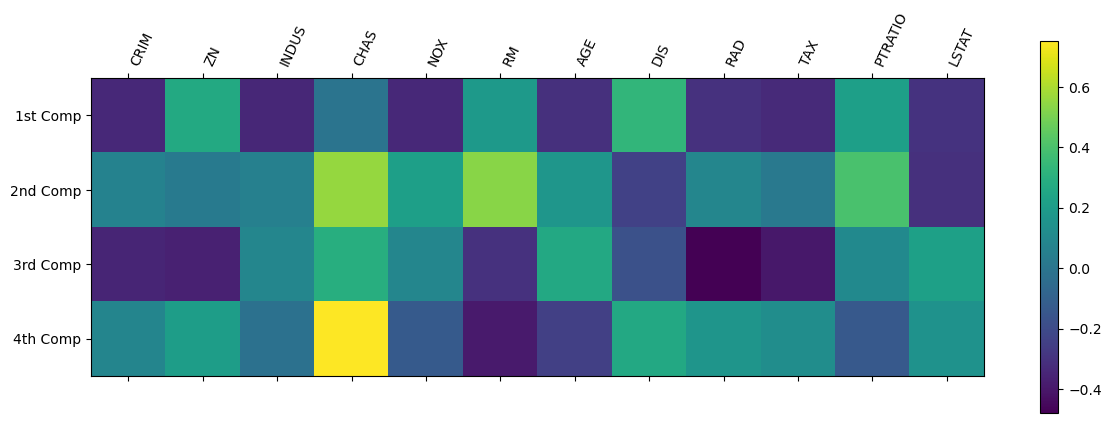

In [45]:
plt.matshow(pca.components_[:4],cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp','4th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

## 6.1.4 PySal - Spatial Data Science Library in Python 

For this part of the notebook, we wanted to introduce one more library to our utensil called PySAL that can conduct both exploratory spatial data analysis as well as more advance spatial regression model such as those you will be learning in ```GEOG0114```. 

PySAL is an open-source project designed to support spatial data science. It was founded as a collaboration between Serge Rey and Luc Anselin in 2005 and since 2018 has been restructured as a meta-package that brings together a family of packages for spatial data science. 

It has four essential components where libraries sits within each;
* Lib - core spatial data structures
* Explore - conduct EDA for spatial and temporal data
* Model - estimating of spatial regression models
* Viz - visualize patterns in spatial data

![pysal](https://pysal.org/pysal1.png)

>pip install pysal

>conda install -c conda-forge pysal

For more details please see:  
https://pysal.org/esda/notebooks/spatialautocorrelation.html (new syntax)

**Reference** </p>
PySAL: A Python Library of Spatial Analytical Methods, Rey, S.J. and L. Anselin, Review of Regional Studies 37, 5-27 2007.

In [46]:
!pip install pysal


### from EDA to ESDA (Exploratory Spatial Data Analysis)
a family of techniques to explore and characterise spatial patterns in data. There are a series of techniques that places space as a 'first class citizen'. How can ESDA useful?:
   * is the variable I'm interested in concentrated in space?
   * do similar values correspond to observations at are close to each other in space?
   * can I identify any particular areas that have concentrations of similar values?
   

### Spatial Autocorrelation (Moran's I) - (PSA) 

You will learn more about this set of method in ```GEOG0114 Principles of Spatial Analysis```. However we believe it is also important to know you can compute similar statistics also in Python. Spatial autocorrelation is a fundamental concept in spatial data science - where things happen has a role in explaning why they happen. 

    "Everything is related to everything else, but near things are more related than distant things" - Waldo Tobler, 1970
    
**Spatial Autocorrelation** is a statistical represantation of Toblers law, the spatial counterpart of traditional correlation.

* Global spatial autocorrelation
* Local spatial autocorrelation

### Spatial Autocorrelation using PySAL

When you install PySal (a meta-package), a number of libraries gets installed. For this short demonstration we would be using the base LibPySAL library and the ESDA Library to conduct spatial autocorrelation on the US Income dataset that gets pre-installed in the library.

In [47]:
#by convention, we use these shorter two-letter names
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# these two lines uses the pysal libraries
import libpysal as lps
import esda


In [48]:
# let's look at the income dataset
lps.examples.explain('us_income')

us_income

Per-capita income for the lower 48 US states 1929-2009
------------------------------------------------------

* spi_download.csv: regional per capita income time series 1969-2008. (source:  Regional Economic Information System, Bureau of Economic Analysis, U.S. Department of Commerce) 
* states48.gal: contiguity weights in GAL format.
* us48.dbf: attribute data. (k=8)
* us48.shp: Polygon shapefile. (n=48) 
* us48.shx: spatial index.
* usjoin.csv: 48 US states per capita income time series 1929-2009.



In [49]:
# get both the shapefile and the csv

shp_path = lps.examples.get_path('us48.shp')
us=gpd.read_file(shp_path)

csv_path = lps.examples.get_path('usjoin.csv')
df=pd.read_csv(csv_path)

In [50]:
# merged the two dataset
us['STATE_FIPS']=us['STATE_FIPS'].astype('int')
merged=pd.merge(us,df,left_on='STATE_FIPS',right_on='STATE_FIPS')

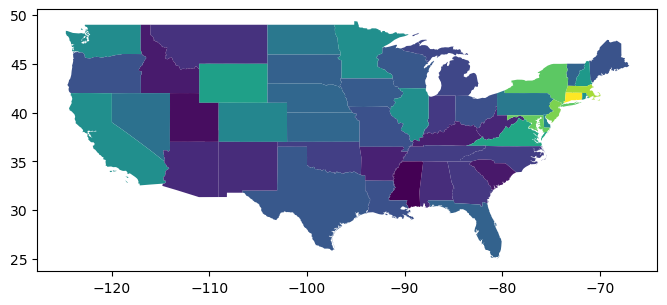

In [51]:
# visualise the income in the US in 2009
merged.plot(column='2009',figsize=(8,8))
plt.show()

### Types of Neighbours (Spatial Contiguity)

![](neighbours.jpg)

In [52]:
# k-nearest neighbours weights for calculating moran's I
from libpysal.weights import KNN
knn4 = KNN.from_shapefile(shp_path, k=4)

# calcualte moran's I for k-nearest neighbour
moransI = esda.Moran(merged['2009'], knn4)

# reporting (null:spatial autocorrelation is significant)
print (f'Morans I: {moransI.I}')
print (f'Morans I(p-value): {moransI.p_sim}')

Morans I: 0.502747146588574
Morans I(p-value): 0.001


In [53]:
# queens neighbour weights for calculating moran's I
from libpysal.weights import Queen
qW = Queen.from_shapefile(shp_path)

# calcualte moran's I for Queen's neighbour
moransI = esda.Moran(merged['2009'], qW)

# reporting (null:spatial autocorrelation is significant)
print (f'Morans I: {moransI.I}')
print (f'Morans I(p-value): {moransI.p_sim}')

Morans I: 0.4287689505041785
Morans I(p-value): 0.001


In [54]:
# rooks neighbour weights for calculating moran's I
from libpysal.weights import Rook
rW = Rook.from_shapefile(shp_path)

# calcualte moran's I for Rook's neighbour
moransI = esda.Moran(merged['2009'], rW)

# reporting (null:spatial autocorrelation is significant)
print (f'Morans I: {moransI.I}')
print (f'Morans I(p-value): {moransI.p_sim}')

Morans I: 0.4256049604873086
Morans I(p-value): 0.001


### Many more advance functions to explore in PySAL

There are many many functions in **PySAL** (the library is constantly being updated) that we did not have the bandwidth to cover in this notebook. PySAL has a highly informative website with lots of examples. Some of these can complement your learning of spatial regression in **PSA**. 

One example of this is the Geographic Weighted Regression or GWR. 
https://pysal.org/notebooks/model/mgwr/GWR_Georgia_example.html

Lab Exercise 6.2 : Supervised Learning - Regression Analysis
-------------------------------



## Lab Exercise 6.2.1: Principal Component Regression

**Principal component linear regression**

1. conduct principal component linear regression analysis with a progressively increasing number of components, and store the results for each successive iteration. Use PCA features created above (pcadf_p) and create a loop where each iteration use one component more in the training set. tips: np.arange(0,n,1) 

2. report the r2 and mse for each iteration

**SGD Regression**

3. use the SGD regression instead where gridsearch is applied to find the optimal learning rate [1,0.5,0.1,0.01,0.001,0.0001] 

4. plot the coefficients for the optimal learning rate 

**decision tree regression**

5. report the r2 and mse with a decision tree regression (extra: can try other methods).

In [138]:
# conduct principal component linear regression analysis with a progressively increasing number of components, and store the results for each successive iteration. Use PCA features created above (pcadf_p) and create a loop where each iteration use one component more in the training set. tips: np.arange(0,n,1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [70]:
# conduct principal component linear regression analysis and store the results for each successive components
# tips: np.arange(0, n, 1)
n=int(pcadf_p.shape[1])
var = [] # an empty list to store the feature indices that are used in each iteration
r2 = []
mse = []
for i in np.arange(0, n, 1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(pcadf_p[var], y, train_size=0.7, random_state=1)
    # print (var)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2.append(r2_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    print(f'{i}th MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'{i}th R2: {r2_score(y_test, y_pred)}')


0th MSE: 59.400836734914435
0th R2: 0.35190476087725
1th MSE: 26.463080376319553
1th R2: 0.711273487931616
2th MSE: 25.804600155322227
2th R2: 0.7184578630977326
3th MSE: 21.186817165625442
3th R2: 0.7688403717529588
4th MSE: 19.10414245682238
4th R2: 0.7915634786586779
5th MSE: 20.56896803173906
5th R2: 0.7755814397947246
6th MSE: 20.584504801792217
6th R2: 0.7754119252347238
7th MSE: 19.33955147868231
7th R2: 0.7889950389749943
8th MSE: 19.847657791540637
8th R2: 0.7834513244343851
9th MSE: 19.55359399224188
9th R2: 0.7866597194469735
10th MSE: 18.53902256502463
10th R2: 0.7977292421653797
11th MSE: 17.598267329372423
11th R2: 0.8079933903309497


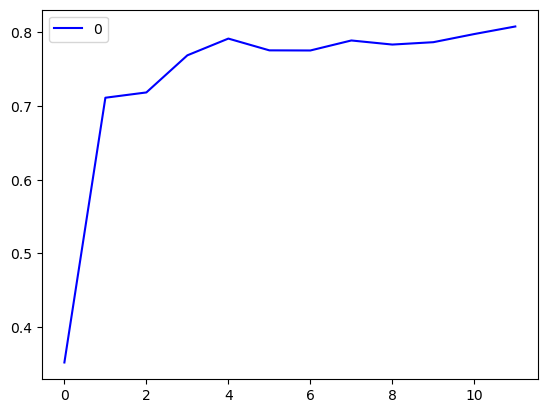

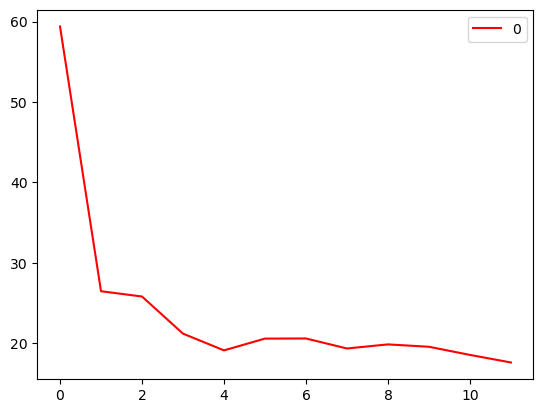

In [73]:
# 2. report the r2 and mse in a plot
pd.DataFrame(r2).plot(c="blue")
plt.show()
pd.DataFrame(mse).plot(c="red")
plt.show()

In [82]:
# 3. run SGD regression using gridsearch to find the optimal learning rate [1, 0.5, 0.1, 0.01, 0.001, 0.0001]
from sklearn.linear_model import SGDRegressor
n = int(pcadf_p.shape[1])
var = np.arange(0, n, 1)

# split the dataset into training and testing sets (70% train, 30% test)
(X_train, X_test, y_train, y_test) = train_test_split(pcadf_p[var], y, train_size = 0.7, random_state = 1)

# initialise the SGDRegressor model with a maximum iteration limit of 1000
sgdmodel = SGDRegressor(max_iter=1000)

# define the hyperparameter turning grid for the learning rate (alpha)
tuned_parameters = [{'alpha': [1, 0.5, 0.1, 0.01, 0.001, 0.0001]}]

# set up GridSearchCV to find the best learning rate using R2 as the scoring metric
SGD_GridSearch = GridSearchCV(sgdmodel, tuned_parameters, scoring = 'r2')

# fit and grid search on the training data
SGD_GridSearch.fit(X_train, y_train)

# print the best score and the best hyperparameters found
print("Best Score: {}".format(SGD_GridSearch.best_score_))
print("Best params: {}".format(SGD_GridSearch.best_params_))

Best Score: 0.7220810223442318
Best params: {'alpha': 0.01}


MSE:  17.746897850393424
R2:  0.8063717510013235


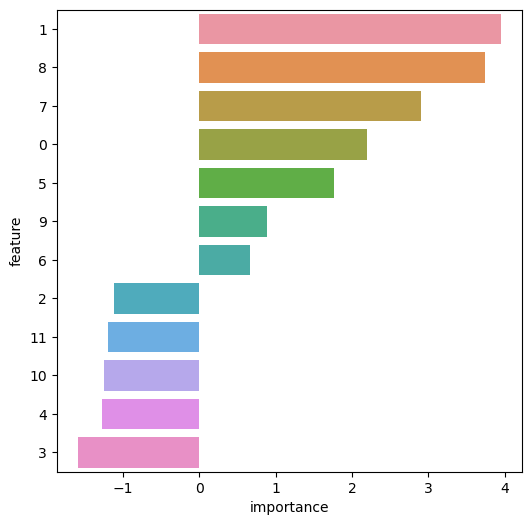

In [97]:
# 4. plot the coefficients for the optimal learning rate
# initialise a new SGDRegressor with the best learning rate (alpha) found
model3 = SGDRegressor(max_iter=1000, alpha=SGD_GridSearch.best_params_['alpha'])

# train the model on the training data
model3.fit(X_train, y_train)

# make predictions on the test set
y_pred = model3.predict(X_test)

# print the mean squared error and R2 score for the model on the test set
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

# create a dataframe to visualise the feature importance (coefficients)
coef = pd.DataFrame(model3.coef_, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
coef = coef.reset_index()
coef.columns = ['feature', 'importance']

# sort the coefficients by impotrance in descending order
coef = coef.sort_values(by = 'importance', ascending = False)

# plot the feature importance using a barplot
plt.figure(figsize = (6, 6))
sns.barplot(x = 'importance', y = 'feature', data = coef)
plt.show()

In [98]:
# 5. report the r2 and mse with a decision tree regression to practice
from sklearn.tree import DecisionTreeRegressor

In [110]:
var = []
NNr2 = [] # list to store R2 scores for each model iteration
NNmse = [] # list to store mean squared errors (MSE) for each model iteration

for i in np.arange(0, n, 1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(pcadf_p[var], y, train_size = 0.7, random_state = 1)
    
    # initialise the decision tree regressor with a maximum depth of 12
    model = DecisionTreeRegressor(max_depth = 12, random_state = 1)
    # train the model on the training data
    model.fit(X_train, y_train)
    # make predictions on the tests set
    y_pred = model.predict(X_test)
    
    # calculate and store the R2 score for the current iteration
    NNr2.append(r2_score(y_test, y_pred))
    
    # Calculate and store the MSE for the current iteration
    NNmse.append(mean_squared_error(y_test, y_pred))
    
    # print the MSE and R2 for the current iteration
    print(f'{i}th MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'{i}th R2: {r2_score(y_test, y_pred)}')

0th MSE: 116.05361025883478
0th R2: -0.26620762309142765
1th MSE: 38.456624867227596
1th R2: 0.580417434178494
2th MSE: 24.95428706443129
2th R2: 0.7277352385735945
3th MSE: 49.59811301169591
3th R2: 0.4588577757616239
4th MSE: 41.69482629056716
4th R2: 0.5450869061734342
5th MSE: 33.39650766714032
5th R2: 0.6356260481819417
6th MSE: 23.39554659630848
6th R2: 0.744741939690055
7th MSE: 33.23760460968959
7th R2: 0.6373597664370473
8th MSE: 29.06803967961314
8th R2: 0.6828519737683186
9th MSE: 34.85939310553169
9th R2: 0.6196651772562602
10th MSE: 28.237977681555076
10th R2: 0.6919083988742287
11th MSE: 37.28283406304752
11th R2: 0.5932241263688759


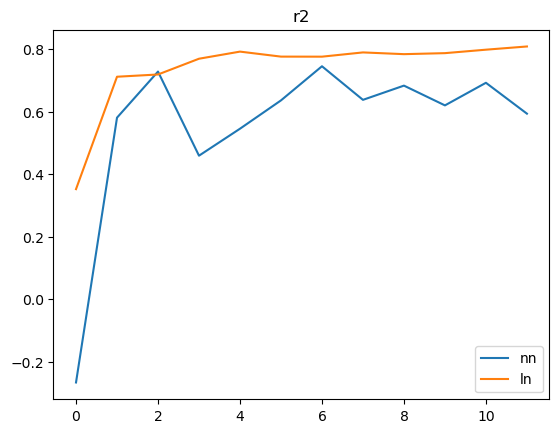

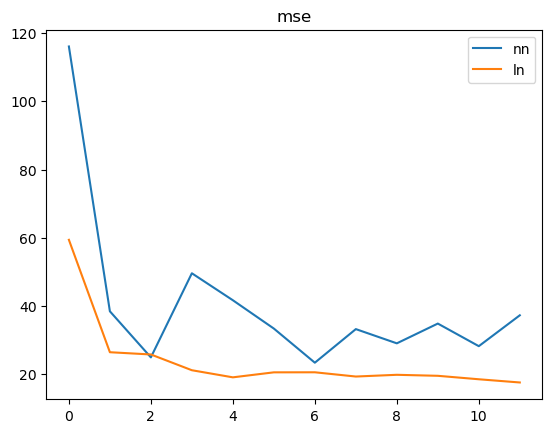

In [118]:
pd.DataFrame([NNr2, r2], index = ['nn', 'ln']).T.plot()
plt.title('r2')

pd.DataFrame([NNmse, mse], index = ['nn', 'ln']).T.plot()
plt.title('mse')
plt.show()